In [ ]:
# Weiling Li (wel4007@med.cornell.edu)
# Supplementary Figures

In [ ]:
# Fig. S1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
samples = ['DTB-097-Progression-cfDNA','DTB-102-Progression-cfDNA','DTB-119-Progression-cfDNA','DTB-149-Baseline-cfDNA',
       'DTB-156-Baseline-cfDNA','DTB-183-Baseline-cfDNA','DTB-205-Baseline-cfDNA','DTB-210-Baseline-cfDNA','DTB-214-Baseline-cfDNA',
       'DTB-216-Progression-cfDNA','DTB-258-Baseline-cfDNA','DTB-261-Baseline-cfDNA','DTB-266-Baseline-cfDNA']

In [3]:
def percentileID(sortTPM_index):# sampleTPM: PM1640protein, sortTPM_index: PM1640_sortindex
    percentiles = []
    for i in range(0,10):
        start = round(len(sortTPM_index) * i/10)
        end = round(len(sortTPM_index) * (i+1)/10) -1
        percentiles.append(sortTPM_index[start:end+1]) # percentile
    return percentiles


In [4]:
# samplename = 'DTB-266-Baseline' # TFx=0.116
samplename ='DTB-214-Baseline' #(cov=125.33X, TFx = 0.6349) 

TPMmat = pd.read_csv(f'csv_files/rna.csv',sep='\t')[['GENE_ID','IDENTIFIER',samplename+'-cfDNA']]
cov2kmat = pd.read_csv(f'csv_files/2k/{samplename}-cfDNAcov2k_bygene.csv') # python/cov2k.py
fft2kmat = pd.read_csv(f'csv_files/2k/{samplename}-cfDNAfft2k_window190_bygene.csv') # python/fft2k.py
sl2kmat = pd.read_csv(f'csv_files/2k/{samplename}-cfDNAsl2k_window190_bygene.csv') # python/sl2k_190.py



In [5]:
#sl2kmat = pd.read_csv(f'slurm/herberts/csv_files/2k/{samplename}-cfDNAsl2k_window190_bygene.csv')
sl2kmat=sl2kmat.dropna(axis=1, how='all')

In [6]:
intersection_set = set(TPMmat['GENE_ID']).intersection(set(sl2kmat.columns))
# print(len(intersection_set))

In [7]:
TPMmat2=TPMmat[TPMmat['GENE_ID'].isin(intersection_set)]
TPMmat2.index=TPMmat2['GENE_ID']


In [8]:
TPMmatsorted=TPMmat2.iloc[np.flip(np.argsort(TPMmat2[samplename+'-cfDNA']))]
#TPMmatsorted.index

In [9]:
IDs=percentileID(TPMmatsorted.index)

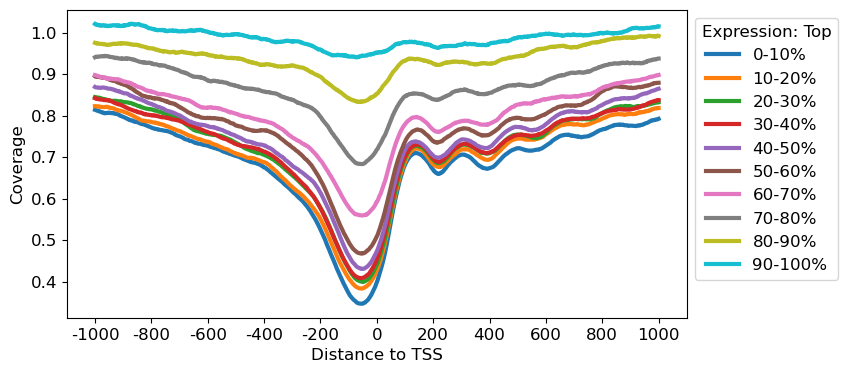

In [10]:
fig = plt.figure(figsize=(8,4))

for i in range(0,10):
    start = 1*i
    end = 1*(i+1)
 
    #a=[np.median(bp) for bp in cov2kmat[IDs[i].values]]
    a = cov2kmat[IDs[i].values].mean(axis=1)
    j=10*(i+1)
    j0=10*(i)
    s=f"{j0}-{j}"
    plt.plot(a, label= f'{s}%',linewidth=3)
plt.legend(fontsize=12,title='Expression: Top', title_fontsize=12,bbox_to_anchor=(1, 1))
plt.xticks(range(0, 2100,200), range(-1000,1100,200))
plt.tick_params(axis="x", labelsize=12)#16) 
plt.tick_params(axis="y", labelsize=12)#16) 
plt.xlabel("Distance to TSS",fontsize=12)
plt.ylabel("Coverage",fontsize=12)

# plt.savefig('2025figures/FigS1a_DTB214B.pdf', dpi=500, bbox_inches='tight')
plt.show()

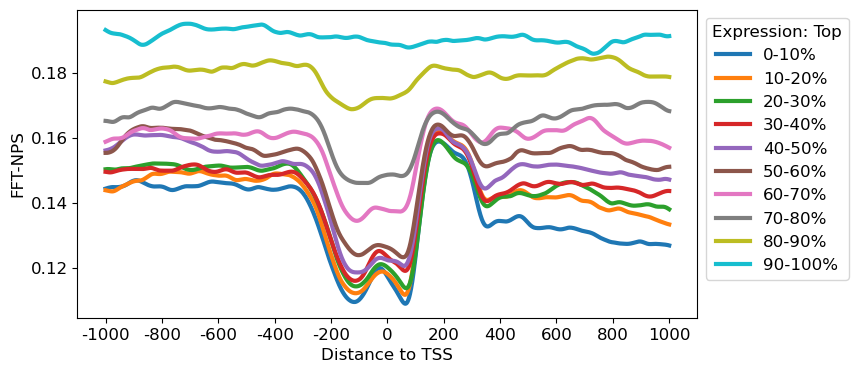

In [11]:
fig = plt.figure(figsize=(8,4))

for i in range(0,10):
    start = 1*i
    end = 1*(i+1)
 
    #a=[np.median(bp) for bp in cov2kmat[IDs[i].values]]
    a = fft2kmat[IDs[i].values].mean(axis=1)
    j=10*(i+1)
    j0=10*(i)
    s=f"{j0}-{j}"
    plt.plot(a, label= f'{s}%',linewidth=3)
plt.legend(fontsize=12,title='Expression: Top', title_fontsize=12,bbox_to_anchor=(1, 1))
plt.xticks(range(0, 2100,200), range(-1000,1100,200))
plt.tick_params(axis="x", labelsize=12)#16) 
plt.tick_params(axis="y", labelsize=12)#16) 
plt.xlabel("Distance to TSS",fontsize=12)
plt.ylabel("FFT-NPS",fontsize=12)

# plt.savefig('2025figures/FigS1b_DTB214B.pdf', dpi=500, bbox_inches='tight')
plt.show()


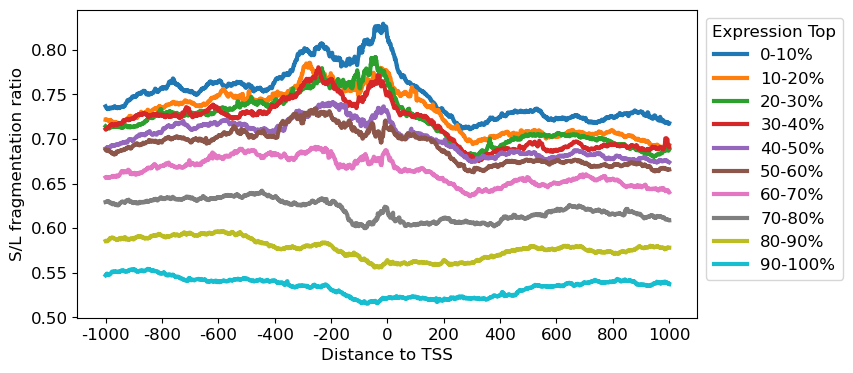

In [12]:
fig = plt.figure(figsize=(8,4))

for i in range(0,10):
    start = 1*i
    end = 1*(i+1)
 
    #a=[np.median(bp) for bp in cov2kmat[IDs[i].values]]
    a = sl2kmat[IDs[i].values].mean(axis=1)
    j=10*(i+1)
    j0=10*(i)
    s=f"{j0}-{j}"
    plt.plot(a, label= f'{s}%',linewidth=3)
plt.legend(fontsize=12,title='Expression Top', title_fontsize=12,bbox_to_anchor=(1, 1))
plt.xticks(range(0, 2100,200), range(-1000,1100,200))
plt.tick_params(axis="x", labelsize=12)#16) 
plt.tick_params(axis="y", labelsize=12)#16) 
plt.xlabel("Distance to TSS",fontsize=12)
plt.ylabel("S/L fragmentation ratio",fontsize=12)

# plt.savefig('2025figures/FigS1c_DTB214B.pdf', dpi=500, bbox_inches='tight')
plt.show()

In [13]:
bigmat=pd.read_csv(f'csv_files/2k/{samplename}-cfDNAbigmat_withTPM.csv')
bigmat.index=bigmat['gene_id']

In [14]:
mydf=pd.DataFrame()
for i in range(0,10):
    new_df = pd.DataFrame([bigmat.loc[IDs[i].values]['meansimpson1k'].values])
    mydf = pd.concat([mydf, new_df], axis=0, ignore_index=True)
mydf

0         1         2         3         4         5         6     \
0  2.131838  2.091142  2.065466  2.195662  2.236135  2.174421  2.094407   
1  2.097541  2.203284  2.198827  2.140791  2.179537  2.018519  2.299565   
2  2.146942  2.052265  2.113443  2.147140  2.021781  2.256060  2.090835   
3  2.104719  2.035984  2.045223  2.279449  2.045945  2.190578  2.136451   
4  2.139026  2.200281  2.042760  2.131494  2.180601  2.172389  2.206878   
5  2.182084  1.958699  2.005137  2.214773  2.111733  2.106893  2.253197   
6  2.387396  2.010094  2.113168  2.110160  2.135901  2.264909  2.173724   
7  1.974548  2.059052  2.204902  2.125269  2.082827  2.089120  2.220353   
8  2.041535  2.060548  2.060561  2.027158  2.023733  2.219055  2.096919   
9  1.974383  2.004372  2.690867  1.982093  2.053169  1.960285  2.085645   

       7         8         9     ...      1342      1343      1344      1345  \
0  2.173957  2.242863  2.245992  ...  2.141560  2.123585  2.129027  2.164814   
1  2.133317  2.166928  2.062580  ...  2.141725  2.134618  2.217702  2.220346   
2  1.940152  2.317849  2.106881  ...  2.307144  2.188818  2.114825  2.141236   
3  2.036056  2.041092  2.199950  ...  2.077955  2.028624  2.284668  2.070206   
4  2.230775  2.245171  2.043698  ...  2.001181  2.139836  2.123255  2.179821   
5  2.072271  2.185197  2.101933  ...  2.259388  2.098797  2.218203  2.141569   
6  2.064485  2.145012  2.158208  ...  1.990641  2.198481  2.131030  1.964305   
7  2.170003  1.963478  2.128633  ...  1.973035  1.940301  2.113747  2.070844   
8  2.135180  2.011503  2.061139  ...  1.959963  1.993452  2.119135  2.104285   
9  1.938772  2.054153  2.123314  ...  2.004066  2.046412  1.975818  2.056993   

       1346      1347      1348      1349      1350      1351  
0  2.089280  2.264157  2.117145  2.282072  2.219997  2.110476  
1  2.104852  2.160247  2.021235  2.187500  2.109590       NaN  
2  2.082306  2.006832  2.095793  2.122735  2.029248  2.155368  
3  2.122153  2.370662  1.996457  2.200795  2.130818       NaN  
4  2.048370  2.113780  2.251131  2.223673  2.363393  2.247515  
5  2.204731  2.214050  2.150172  2.210622  2.132583  2.151544  
6  1.970625  1.937326  2.248894  2.253205  2.080753       NaN  
7  2.084856  2.077454  2.043765  2.003353  2.054929  2.207478  
8  1.978791  1.913634  2.022418  1.920130  1.953009       NaN  
9  1.968882  2.013272  1.980086  1.973466  1.980986  2.023846  

[10 rows x 1352 columns]

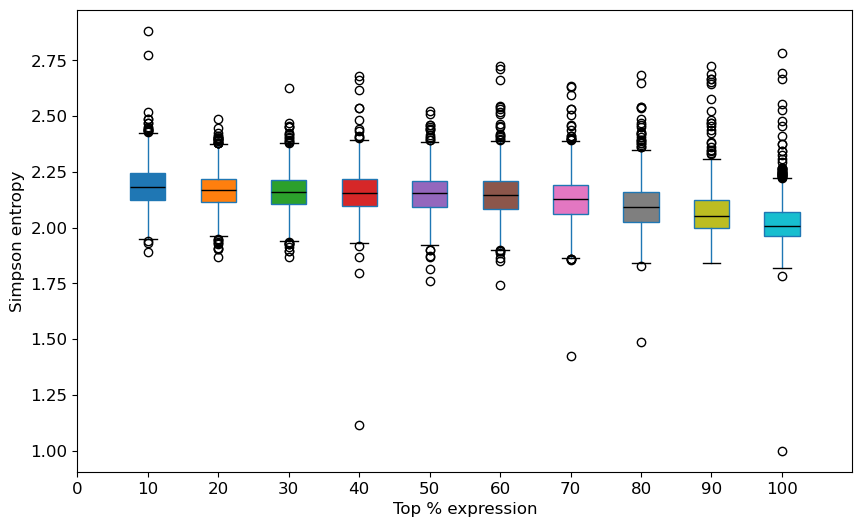

In [15]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


# Boxplot with custom colors
box = mydf.T.boxplot(patch_artist=True, return_type='dict', figsize=(10, 6) ,medianprops={'linestyle': '-', 'color': 'black'})

# Apply colors to boxes
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.grid(False)
plt.xlim(0,11)
plt.xticks(range(0, 11, 1), range(0,110,10))
plt.xlabel('Top % expression',fontsize=12)
plt.ylabel('Simpson entropy',fontsize=12)
plt.tick_params(axis="x", labelsize=12)#16) 
plt.tick_params(axis="y", labelsize=12)#16) 

# plt.savefig('2025figures/FigS1e_DTB214B.pdf', dpi=500, bbox_inches='tight') #1d
plt.show()

In [ ]:
# Fig. S2

In [ ]:
# hyperparameter tuning in optuna/

In [ ]:
## gbr ##

In [23]:
import optuna
study = optuna.load_study(
    study_name="gbr150_multiobj_log2TPM",
    storage="sqlite:///optuna/gbr_study.db"
)



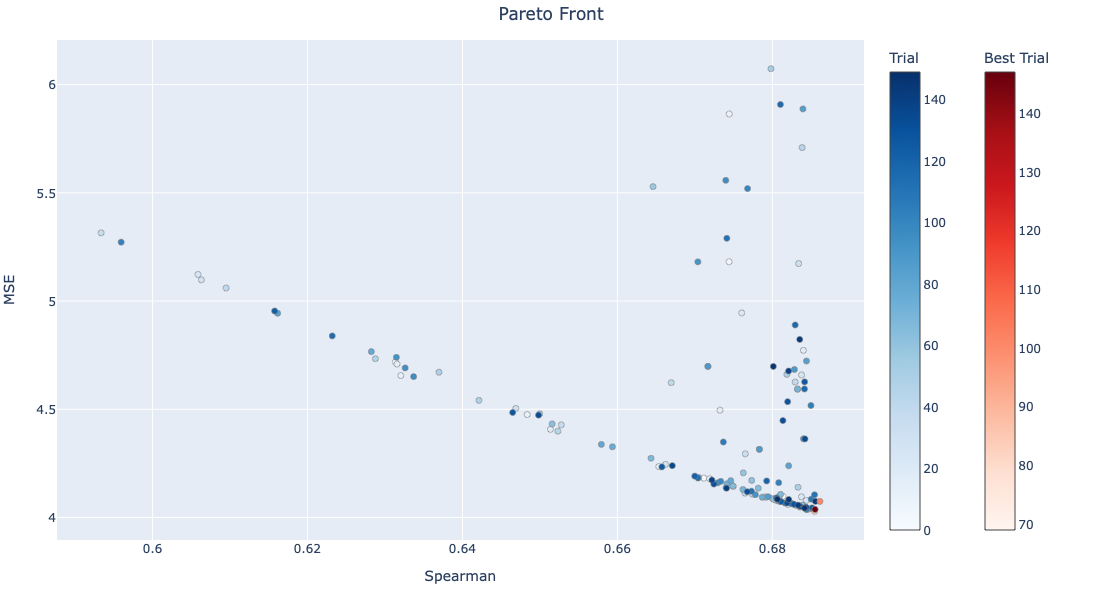

In [24]:
import optuna.visualization as vis

fig = vis.plot_pareto_front(study, target_names=["Spearman", "MSE"])

fig.update_layout(
    title="Pareto Front",
    title_x=0.5,
    font=dict(size=12),
    width=600,     # 384: 4 inches
    height=600,
    margin=dict(t=40, b=60, l=40, r=40)
)
# fig.write_image('2025figures/FigS2a_gbr_paretofront.pdf', scale=1)
fig.show()


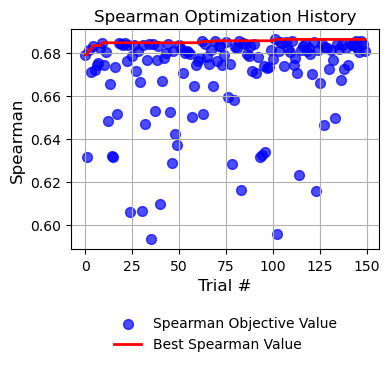

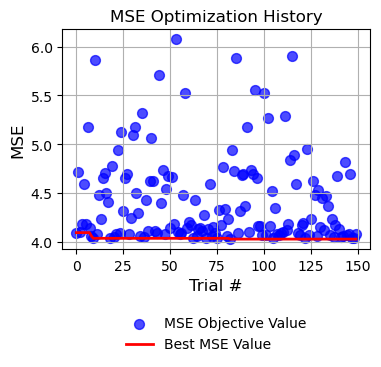

In [25]:
import optuna
import matplotlib.pyplot as plt

# Track the history of Spearman and MSE
history_spearman = []
history_mse = []
best_spearman = -float('inf')
best_mse = float('inf')
best_spearman_history = []
best_mse_history = []

for trial in study.trials:
    spearman = trial.values[0]
    mse = trial.values[1]

    history_spearman.append(spearman)
    history_mse.append(mse)

    if spearman > best_spearman:
        best_spearman = spearman
    if mse < best_mse:
        best_mse = mse

    best_spearman_history.append(best_spearman)
    best_mse_history.append(best_mse)

# ----------------- Spearman Figure -----------------
plt.figure(figsize=(4, 4))
plt.scatter(range(len(history_spearman)), history_spearman, color='b', label='Spearman Objective Value', alpha=0.7, s=50)
plt.plot(best_spearman_history, color='r', label='Best Spearman Value', linewidth=2)
plt.xlabel("Trial #", fontsize=12)
plt.ylabel("Spearman", fontsize=12)
plt.title("Spearman Optimization History", fontsize=12)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1, fontsize=10, frameon=False)  # ncol=1 for vertical layout
plt.tight_layout()
# plt.savefig('2025figures/FigS2a_gbr_spearman.pdf', dpi=500, bbox_inches='tight')
plt.show()

# ----------------- MSE Figure -----------------
plt.figure(figsize=(4, 4))
plt.scatter(range(len(history_mse)), history_mse, color='b', label='MSE Objective Value', alpha=0.7, s=50)
plt.plot(best_mse_history, color='r', label='Best MSE Value', linewidth=2)
plt.xlabel("Trial #", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.title("MSE Optimization History", fontsize=12)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1, fontsize=10, frameon=False)  # ncol=1 for vertical layout
plt.tight_layout()
# plt.savefig('2025figures/FigS2a_gbr_mse.pdf', dpi=500, bbox_inches='tight')
plt.show()



In [ ]:
## xgb ##

In [26]:
study = optuna.load_study(
    study_name="xgb_multiobj_log2TPM",
    storage="sqlite:///optuna/xgb_study.db"
)

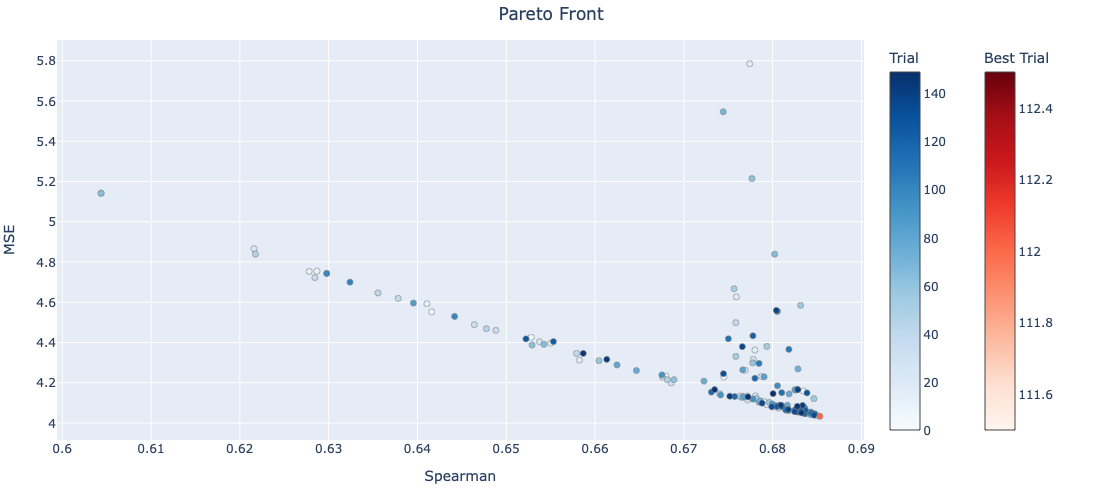

In [27]:
import optuna.visualization as vis

fig = vis.plot_pareto_front(study, target_names=["Spearman", "MSE"])

fig.update_layout(
    title="Pareto Front",
    title_x=0.5,
    font=dict(size=12),
    width=600,
    height=500,
    margin=dict(t=40, b=60, l=40, r=40)  # extra bottom margin for legend
)

# fig.write_image('2025figures/FigS2b_xgb_paretofront.pdf',  scale=1)
fig.show()


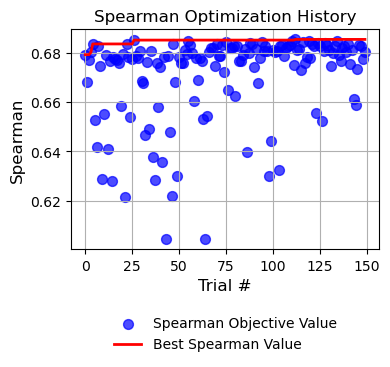

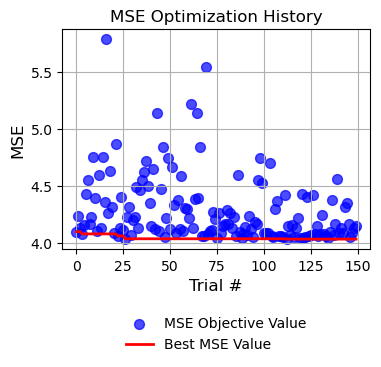

In [28]:
import optuna
import matplotlib.pyplot as plt

# Track the history of Spearman and MSE
history_spearman = []
history_mse = []
best_spearman = -float('inf')
best_mse = float('inf')
best_spearman_history = []
best_mse_history = []

for trial in study.trials:
    spearman = trial.values[0]
    mse = trial.values[1]

    history_spearman.append(spearman)
    history_mse.append(mse)

    if spearman > best_spearman:
        best_spearman = spearman
    if mse < best_mse:
        best_mse = mse

    best_spearman_history.append(best_spearman)
    best_mse_history.append(best_mse)

# ----------------- Spearman Figure -----------------
plt.figure(figsize=(4, 4))
plt.scatter(range(len(history_spearman)), history_spearman, color='b', label='Spearman Objective Value', alpha=0.7, s=50)
plt.plot(best_spearman_history, color='r', label='Best Spearman Value', linewidth=2)
plt.xlabel("Trial #", fontsize=12)
plt.ylabel("Spearman", fontsize=12)
plt.title("Spearman Optimization History", fontsize=12)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1, fontsize=10, frameon=False)  # ncol=1 for vertical layout
plt.tight_layout()
# plt.savefig('2025figures/FigS2b_xgb_spearman.pdf', dpi=500, bbox_inches='tight')
plt.show()

# ----------------- MSE Figure -----------------
plt.figure(figsize=(4, 4))
plt.scatter(range(len(history_mse)), history_mse, color='b', label='MSE Objective Value', alpha=0.7, s=50)
plt.plot(best_mse_history, color='r', label='Best MSE Value', linewidth=2)
plt.xlabel("Trial #", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.title("MSE Optimization History", fontsize=12)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1, fontsize=10, frameon=False)  # ncol=1 for vertical layout
plt.tight_layout()
# plt.savefig('2025figures/FigS2b_xgb_mse.pdf', dpi=500, bbox_inches='tight')
plt.show()



In [ ]:
## rf ##

In [29]:
study = optuna.load_study(
    study_name="rf150_multiobj_log2TPM",
    storage="sqlite:///optuna/rf_study.db"
)


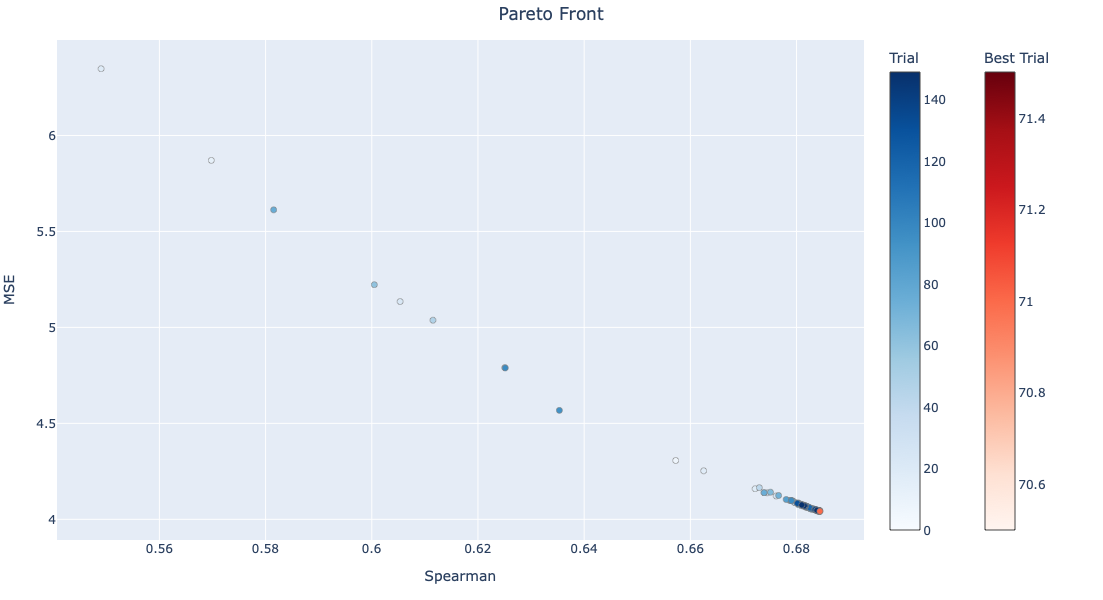

In [30]:
import optuna.visualization as vis

fig = vis.plot_pareto_front(study, target_names=["Spearman", "MSE"])

fig.update_layout(
    title="Pareto Front",
    title_x=0.5,
    font=dict(size=12),
    width=600,
    height=600,
    # legend=dict(
    #     orientation='h',      # horizontal layout
    #     x=0.5,                # center horizontally
    #     xanchor='center',
    #     y=-0.2,               # position below the plot
    #     yanchor='top',
    #     font=dict(size=9)     # smaller font to reduce space
    # ),
    margin=dict(t=40, b=60, l=40, r=40)  # extra bottom margin for legend
)

# fig.write_image('2025figures/FigS2c_rf_paretofront.pdf', scale=1)
fig.show()


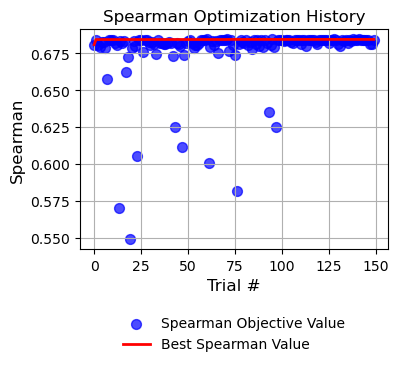

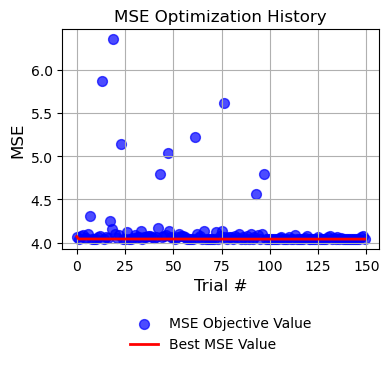

In [32]:
import optuna
import matplotlib.pyplot as plt

# Track the history of Spearman and MSE
history_spearman = []
history_mse = []
best_spearman = -float('inf')
best_mse = float('inf')
best_spearman_history = []
best_mse_history = []

for trial in study.trials:
    spearman = trial.values[0]
    mse = trial.values[1]

    history_spearman.append(spearman)
    history_mse.append(mse)

    if spearman > best_spearman:
        best_spearman = spearman
    if mse < best_mse:
        best_mse = mse

    best_spearman_history.append(best_spearman)
    best_mse_history.append(best_mse)

# ----------------- Spearman Figure -----------------
plt.figure(figsize=(4, 4))
plt.scatter(range(len(history_spearman)), history_spearman, color='b', label='Spearman Objective Value', alpha=0.7, s=50)
plt.plot(best_spearman_history, color='r', label='Best Spearman Value', linewidth=2)
plt.xlabel("Trial #", fontsize=12)
plt.ylabel("Spearman", fontsize=12)
plt.title("Spearman Optimization History", fontsize=12)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1, fontsize=10, frameon=False)  # ncol=1 for vertical layout
plt.tight_layout()
# plt.savefig('2025figures/FigS2c_rf_spearman.pdf', dpi=500, bbox_inches='tight')
plt.show()

# ----------------- MSE Figure -----------------
plt.figure(figsize=(4, 4))
plt.scatter(range(len(history_mse)), history_mse, color='b', label='MSE Objective Value', alpha=0.7, s=50)
plt.plot(best_mse_history, color='r', label='Best MSE Value', linewidth=2)
plt.xlabel("Trial #", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.title("MSE Optimization History", fontsize=12)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1, fontsize=10, frameon=False)  # ncol=1 for vertical layout
plt.tight_layout()
# plt.savefig('2025figures/FigS2c_rf_mse.pdf', dpi=500, bbox_inches='tight')
plt.show()



In [ ]:
## svr ##

In [34]:
study = optuna.load_study(
    study_name="svr2_multiobj_log2TPM_150",
    storage="sqlite:///optuna/svr_study.db"
)

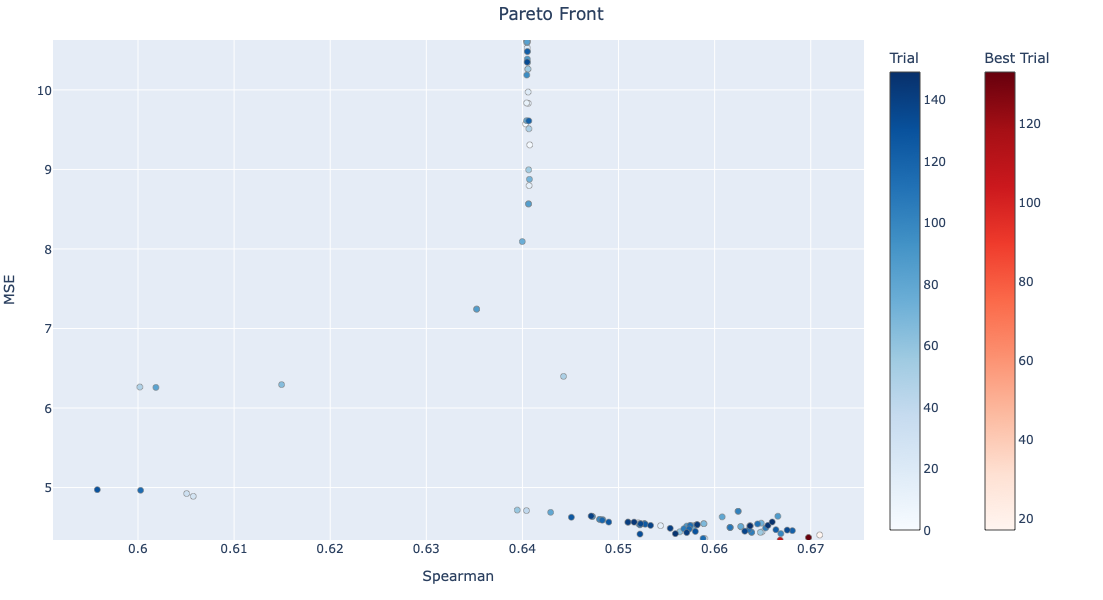

In [35]:
import numpy as np

# Extract MSE values from the Optuna study
mse_values = [trial.values[1] for trial in study.trials if trial.values is not None]

# Plot and adjust y-axis
fig = vis.plot_pareto_front(study, target_names=["Spearman", "MSE"])
fig.update_layout(
    title="Pareto Front",
    title_x=0.5,
    font=dict(size=12),
    width=600,      # Adjust width here
    height=600,      # Adjust height here
    margin=dict(t=40, b=60, l=40, r=40)  # extra bottom margin for legend
)


# fig.write_image('2025figures/FigS2d_svr_paretofront.pdf', scale=1)


fig.show()



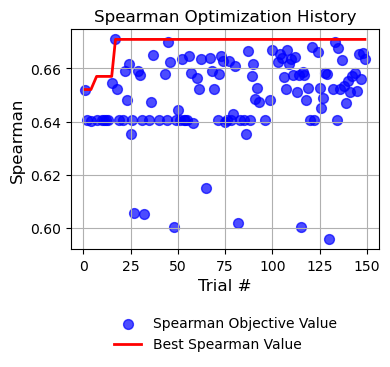

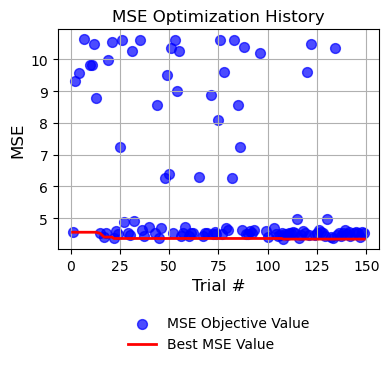

In [36]:
import numpy as np
import optuna
import matplotlib.pyplot as plt

# Track the history of Spearman and MSE
history_spearman = []
history_mse = []
best_spearman = -float('inf')  # Maximize Spearman
best_mse = float('inf')        # Minimize MSE
best_spearman_history = []
best_mse_history = []

# Track the best values over time
for trial in study.trials:
    spearman = trial.values[0]
    mse = trial.values[1]

    history_spearman.append(spearman)
    history_mse.append(mse)

    if spearman > best_spearman:
        best_spearman = spearman
    if mse < best_mse:
        best_mse = mse

    best_spearman_history.append(best_spearman)
    best_mse_history.append(best_mse)


# ----------------- Spearman Figure -----------------
plt.figure(figsize=(4, 4))
plt.scatter(range(len(history_spearman)), history_spearman, color='b', label='Spearman Objective Value', alpha=0.7, s=50)
plt.plot(best_spearman_history, color='r', label='Best Spearman Value', linewidth=2)
plt.xlabel("Trial #", fontsize=12)
plt.ylabel("Spearman", fontsize=12)
plt.title("Spearman Optimization History", fontsize=12)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1, fontsize=10, frameon=False)  # ncol=1 for vertical layout
plt.tight_layout()
# plt.savefig('2025figures/FigS2d_svr_spearman.pdf', dpi=500, bbox_inches='tight')
plt.show()

# ----------------- MSE Figure -----------------
plt.figure(figsize=(4, 4))
plt.scatter(range(len(history_mse)), history_mse, color='b', label='MSE Objective Value', alpha=0.7, s=50)
plt.plot(best_mse_history, color='r', label='Best MSE Value', linewidth=2)
plt.xlabel("Trial #", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.title("MSE Optimization History", fontsize=12)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1, fontsize=10, frameon=False)  # ncol=1 for vertical layout
plt.tight_layout()
# plt.savefig('2025figures/FigS2d_svr_mse.pdf', dpi=500, bbox_inches='tight')
plt.show()




In [ ]:
## NN ##

In [39]:
study = optuna.load_study(
    study_name="nn150_multiobj_log2TPM",
    storage="sqlite:///optuna/nn_study.db"
)

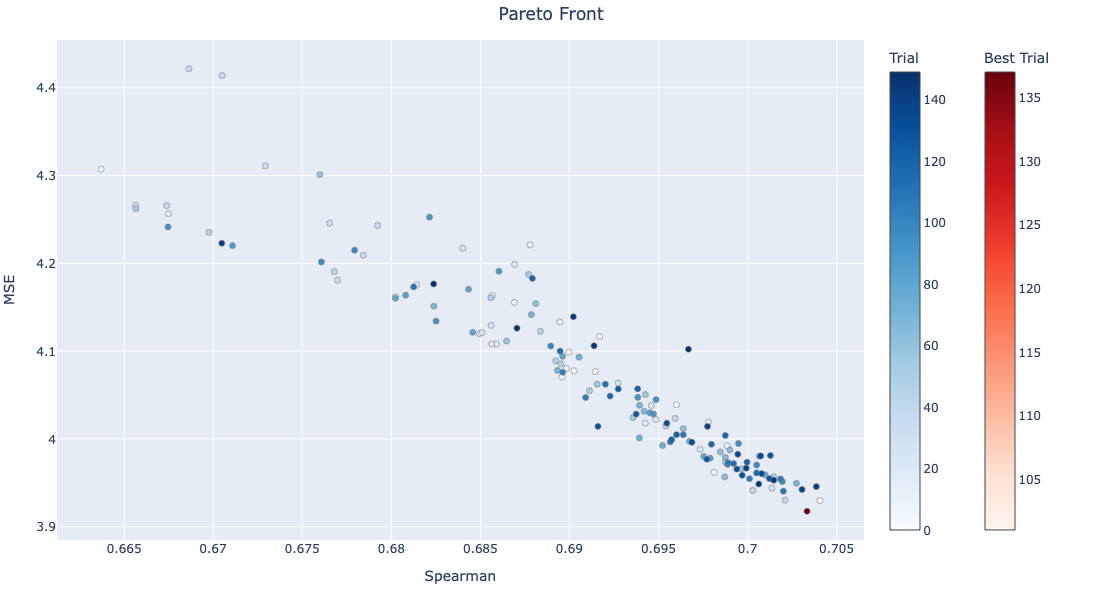

In [41]:
import optuna.visualization as vis

fig = vis.plot_pareto_front(study, target_names=["Spearman", "MSE"])

fig.update_layout(
    title="Pareto Front",
    title_x=0.5,
    font=dict(size=12),
    width=600,
    height=600,
    margin=dict(t=40, b=60, l=40, r=40)  # extra bottom margin for legend
)
# fig.write_image('2025figures/FigS2e_nn_paretofront.pdf', scale=1)

fig.show()


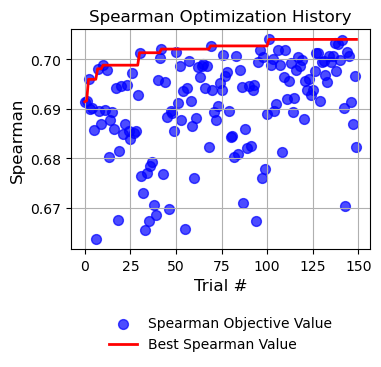

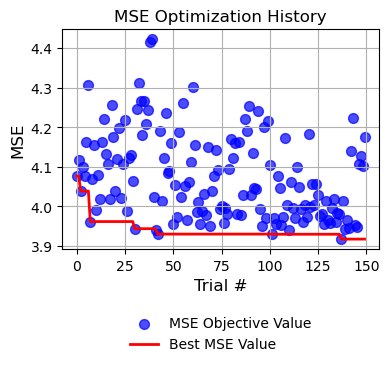

In [42]:
import optuna
import matplotlib.pyplot as plt

# Track the history of Spearman and MSE
history_spearman = []
history_mse = []
best_spearman = -float('inf')
best_mse = float('inf')
best_spearman_history = []
best_mse_history = []

for trial in study.trials:
    spearman = trial.values[0]
    mse = trial.values[1]

    history_spearman.append(spearman)
    history_mse.append(mse)

    if spearman > best_spearman:
        best_spearman = spearman
    if mse < best_mse:
        best_mse = mse

    best_spearman_history.append(best_spearman)
    best_mse_history.append(best_mse)

# ----------------- Spearman Figure -----------------
plt.figure(figsize=(4, 4))
plt.scatter(range(len(history_spearman)), history_spearman, color='b', label='Spearman Objective Value', alpha=0.7, s=50)
plt.plot(best_spearman_history, color='r', label='Best Spearman Value', linewidth=2)
plt.xlabel("Trial #", fontsize=12)
plt.ylabel("Spearman", fontsize=12)
plt.title("Spearman Optimization History", fontsize=12)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1, fontsize=10, frameon=False)  # ncol=1 for vertical layout
plt.tight_layout()
# plt.savefig('2025figures/FigS2e_nn_spearman.pdf', dpi=500, bbox_inches='tight')
plt.show()

# ----------------- MSE Figure -----------------
plt.figure(figsize=(4, 4))
plt.scatter(range(len(history_mse)), history_mse, color='b', label='MSE Objective Value', alpha=0.7, s=50)
plt.plot(best_mse_history, color='r', label='Best MSE Value', linewidth=2)
plt.xlabel("Trial #", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.title("MSE Optimization History", fontsize=12)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1, fontsize=10, frameon=False)  # ncol=1 for vertical layout
plt.tight_layout()
# plt.savefig('2025figures/FigS2e_nn_mse.pdf', dpi=500, bbox_inches='tight')
plt.show()



In [ ]:
# Fig. S3

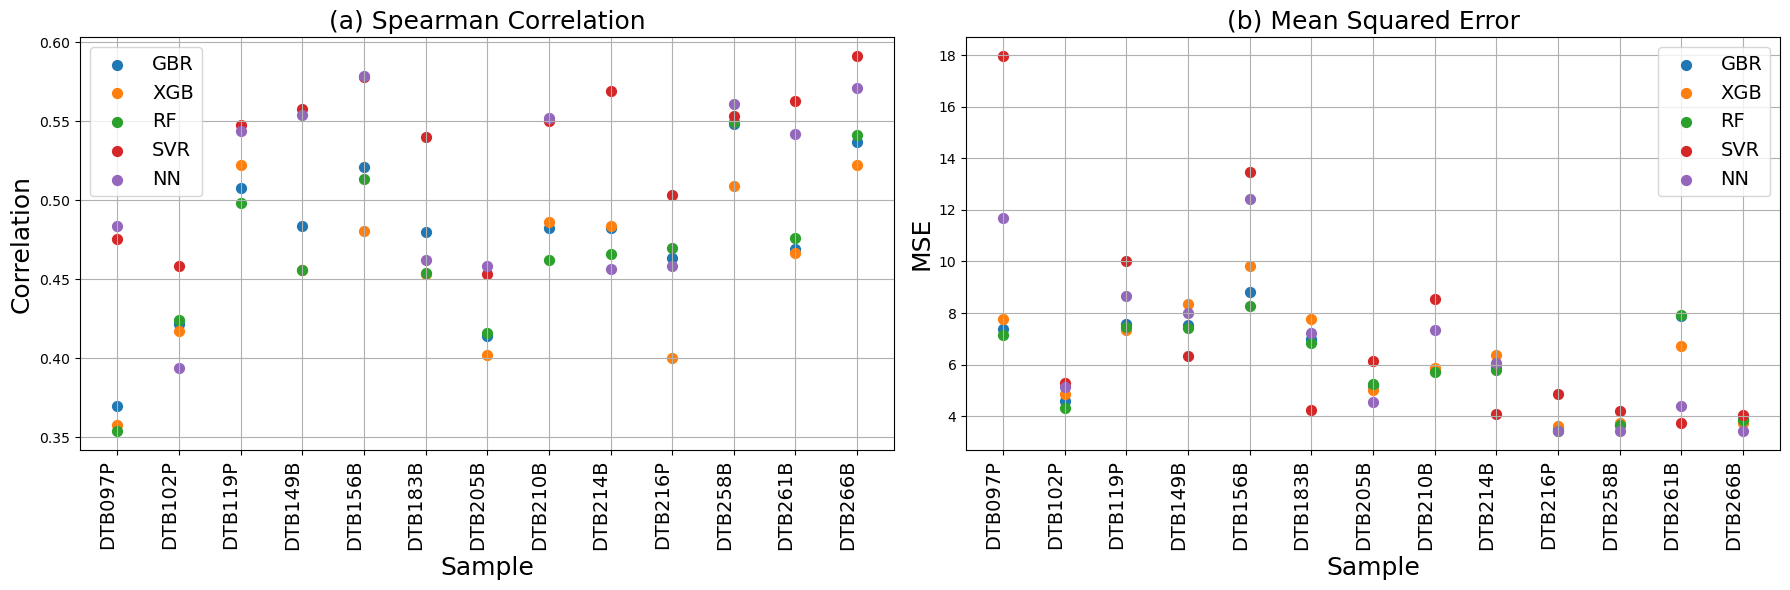

In [22]:
import matplotlib.pyplot as plt

# Sample indices and names
x = list(range(1, 14))
names = ['DTB097P', 'DTB102P', 'DTB119P', 'DTB149B', 'DTB156B', 'DTB183B', 'DTB205B',
         'DTB210B', 'DTB214B', 'DTB216P', 'DTB258B', 'DTB261B', 'DTB266B']

# Spearman correlation values
spearman = {
    "GBR": [0.3701, 0.4218, 0.508, 0.4836, 0.5209, 0.4797, 0.4138, 0.4822, 0.4822, 0.4636, 0.548, 0.4693, 0.5367],
    "XGB": [0.358, 0.4171, 0.5221, 0.4558, 0.4803, 0.4535, 0.402, 0.4863, 0.4835, 0.4002, 0.5089, 0.4669, 0.522],
    "RF":  [0.3537, 0.424, 0.4983, 0.4559, 0.5136, 0.454, 0.4159, 0.4625, 0.4658, 0.4699, 0.5494, 0.4761, 0.5415],
    "SVR": [0.4755, 0.4585, 0.5479, 0.5575, 0.5777, 0.5403, 0.4531, 0.5502, 0.5694, 0.5035, 0.5531, 0.5625, 0.5912],
    "NN":  [0.4834, 0.3936, 0.5437, 0.5541, 0.5785, 0.4624, 0.4583, 0.5521, 0.4563, 0.4587, 0.5612, 0.5416, 0.5711]
}

# MSE values
mse = {
    "GBR": [7.366, 4.5661, 7.5571, 7.5298, 8.8092, 6.9735, 5.186, 5.7562, 5.8513, 3.5042, 3.6528, 7.8797, 3.8297],
    "XGB": [7.7491, 4.8676, 7.3568, 8.3585, 9.8102, 7.7485, 5.0037, 5.8503, 6.3513, 3.6141, 3.7317, 6.7367, 3.7256],
    "RF":  [7.1288, 4.327, 7.4662, 7.4252, 8.2886, 6.8495, 5.2383, 5.7131, 5.7825, 3.4025, 3.6444, 7.9235, 3.8362],
    "SVR": [17.9714, 5.2702, 10.0091, 6.3131, 13.4794, 4.2236, 6.1494, 8.55, 4.063, 4.8628, 4.1912, 3.7257, 4.052],
    "NN":  [11.691, 5.1363, 8.6556, 8.0117, 12.4168, 7.2419, 4.5408, 7.3381, 6.0587, 3.4227, 3.4121, 4.3911, 3.4047]
}

# Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharex=True)

# Plot Spearman
for model, values in spearman.items():
    ax1.scatter(x, values, label=model,s=50)
    #ax1.plot(x, values, marker='o', linestyle='--', label=model)
    
ax1.set_title("(a) Spearman Correlation",fontsize=18)
ax1.set_xlabel("Sample",fontsize=18)
ax1.set_ylabel("Correlation",fontsize=18)
ax1.set_xticks(x)
ax1.set_xticklabels(names, fontsize=14, rotation=90,ha='right')#rotation=45,
ax1.grid(True)
ax1.legend(fontsize=14)

# Plot MSE
for model, values in mse.items():
    ax2.scatter(x, values, label=model,s=50)
    #ax2.plot(x, values, marker='o', linestyle='--', label=model)
ax2.set_title("(b) Mean Squared Error",fontsize=18)
ax2.set_xlabel("Sample",fontsize=18)
ax2.set_ylabel("MSE",fontsize=18)
ax2.set_xticks(x)
ax2.set_xticklabels(names, fontsize=14, rotation=90,ha='right')
ax2.grid(True)
ax2.legend(fontsize=14)

plt.tight_layout()
plt.show()


In [16]:
import optuna
from sklearn.svm import SVR

In [17]:
import optuna
study = optuna.load_study(
    study_name="svr2_multiobj_log2TPM_150",
    storage="sqlite:///optuna150/svr2_study_150.db"
)


In [18]:

# Pick one trial from the Pareto front (e.g., the best Spearman)
best_trial = study.best_trials[0]  # or iterate over study.best_trials

# Extract params
params = best_trial.params

# Handle 'degree' param presence, since it only applies if kernel='poly'
degree = 3  # default degree
if params.get("kernel") == "poly":
    degree = params.get("degree", 3)

# Build the SVR model with best parameters
model = SVR(
    C=params["C"],
    epsilon=params["epsilon"],
    kernel=params["kernel"],
    gamma=params["gamma"],
    degree=degree
)

# Optional: Use StandardScaler as a pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# pipeline = make_pipeline(StandardScaler(), model)


# Load and clean data
traindf = pd.read_csv('/athena/khuranalab/scratch/wel4007/csv_files/finalfeatures/redo/control01bigmat_all_rmdupgenes.csv')[[
    'gene_name', 'meancov1k', 'meancovNDR', 'meanFFT950',
    'meanFFTNDR', 'meanSL1k', 'meansimpson1k_100_300', 'TPM'
]]
traindf = traindf.dropna().reset_index(drop=True)

X = traindf.iloc[:, 1:-1]
y = np.log2(traindf['TPM'] + 1)

model.fit(X, y)

SVR(C=397.1039921978707, epsilon=0.7351783229677453)

In [20]:
from sklearn.inspection import permutation_importance

# Assuming 'model' is your trained SVR model and X, y are your data

# If you used scaling in your pipeline, wrap the model accordingly
# For example, if you used StandardScaler in a pipeline:
# from sklearn.pipeline import make_pipeline
# pipeline = make_pipeline(StandardScaler(), model)

# Run permutation importance
result = permutation_importance(
    model,  # or pipeline if you used one
    X,
    y,
    scoring='neg_mean_squared_error',  # or 'r2', etc.
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

importances = result.importances_mean
# Normalize so they sum to 1
importances /= importances.sum()

# Print feature importances
for feature_name, importance in zip(X.columns, importances):
    print(f"{feature_name}: {importance:.4f}")


meancov1k: 0.2034
meancovNDR: 0.4691
meanFFT950: 0.0550
meanFFTNDR: 0.0235
meanSL1k: 0.1272
meansimpson1k_100_300: 0.1219


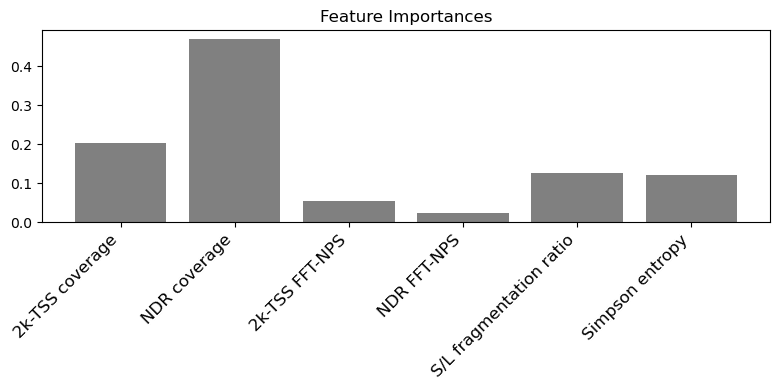

In [21]:
import matplotlib.pyplot as plt

# Renamed features
features = [
    "2k-TSS coverage",
    "NDR coverage",
    "2k-TSS FFT-NPS",
    "NDR FFT-NPS",
    "S/L fragmentation ratio",
    "Simpson entropy"
]

# importances = [0.2034, 0.4691, 0.0550, 0.0235, 0.1272, 0.1219]

plt.figure(figsize=(8,4))
plt.bar(features, importances, color='gray')  # simple gray bars
#plt.ylabel('Mean Permutation Importance', fontsize=12)
plt.title('Feature Importances', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
# plt.savefig('2025figures/FigS3c.pdf', dpi=500, bbox_inches='tight')
plt.show()


In [ ]:
# Fig. S4 # lucap pdx

In [43]:
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error
import pandas as pd
lucap_corr=[]
lucap_mse=[]
for samplename in samples:
    outputmat = pd.read_csv(f'pdx/testfinal/{samplename}.csv')[['TPM', 'correction']] # SVR()
    outputmat = outputmat.dropna()

    # Spearman correlation
    corr, p_value = spearmanr(outputmat['TPM'], outputmat['correction'])
    lucap_corr.append(corr)
    # Mean Squared Error
    mse = mean_squared_error(np.log2(outputmat['TPM']+1), outputmat['correction'])
    lucap_mse.append(mse)
    print(f"{samplename}: Spearman={corr:.4f}, p={p_value:.4e}, MSE={mse:.4f}")


DTB-097-Progression-cfDNA: Spearman=0.4864, p=0.0000e+00, MSE=9.1657
DTB-102-Progression-cfDNA: Spearman=0.4488, p=0.0000e+00, MSE=3.9231
DTB-119-Progression-cfDNA: Spearman=0.5475, p=0.0000e+00, MSE=7.5333
DTB-149-Baseline-cfDNA: Spearman=0.5674, p=0.0000e+00, MSE=5.0742
DTB-156-Baseline-cfDNA: Spearman=0.5971, p=0.0000e+00, MSE=8.4815
DTB-183-Baseline-cfDNA: Spearman=0.5570, p=0.0000e+00, MSE=3.9135
DTB-205-Baseline-cfDNA: Spearman=0.4563, p=0.0000e+00, MSE=5.7007
DTB-210-Baseline-cfDNA: Spearman=0.5578, p=0.0000e+00, MSE=5.6634
DTB-214-Baseline-cfDNA: Spearman=0.5492, p=0.0000e+00, MSE=3.3939
DTB-216-Progression-cfDNA: Spearman=0.4846, p=0.0000e+00, MSE=4.0810
DTB-258-Baseline-cfDNA: Spearman=0.5541, p=0.0000e+00, MSE=3.7831
DTB-261-Baseline-cfDNA: Spearman=0.5689, p=0.0000e+00, MSE=3.6287
DTB-266-Baseline-cfDNA: Spearman=0.5921, p=0.0000e+00, MSE=3.5822


In [45]:

from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error
import pandas as pd
epicseq10corr=[]
epicseq10mse=[]

for samplename in samples:
    outputmat = pd.read_csv(f'/athena/khuranalab/scratch/wel4007/notebooks/slurm/herberts/epicseq/groupby10/{samplename}.withTPM.csv',sep='\t')[['TPM', 'inferredGEP']]
    outputmat = outputmat.dropna()

    # Spearman correlation
    corr, p_value = spearmanr(outputmat['TPM'], outputmat['inferredGEP'])
    epicseq10corr.append(corr)
    # Mean Squared Error
    mse = mean_squared_error(np.log2(outputmat['TPM']+1), outputmat['inferredGEP'])
    epicseq10mse.append(mse)
    print(f"{samplename}: Spearman={corr:.4f}, p={p_value:.4e}, MSE={mse:.4f}")


DTB-097-Progression-cfDNA: Spearman=0.4525, p=0.0000e+00, MSE=13.1074
DTB-102-Progression-cfDNA: Spearman=0.5289, p=0.0000e+00, MSE=18.6145
DTB-119-Progression-cfDNA: Spearman=0.5189, p=0.0000e+00, MSE=15.2196
DTB-149-Baseline-cfDNA: Spearman=0.4934, p=0.0000e+00, MSE=19.8148
DTB-156-Baseline-cfDNA: Spearman=0.4907, p=0.0000e+00, MSE=13.0973
DTB-183-Baseline-cfDNA: Spearman=0.4968, p=0.0000e+00, MSE=21.7323
DTB-205-Baseline-cfDNA: Spearman=0.4409, p=0.0000e+00, MSE=22.3192
DTB-210-Baseline-cfDNA: Spearman=0.5097, p=0.0000e+00, MSE=17.3316
DTB-214-Baseline-cfDNA: Spearman=0.5158, p=0.0000e+00, MSE=26.6342
DTB-216-Progression-cfDNA: Spearman=0.4977, p=0.0000e+00, MSE=16.2556
DTB-258-Baseline-cfDNA: Spearman=0.5322, p=0.0000e+00, MSE=18.1263
DTB-261-Baseline-cfDNA: Spearman=0.5307, p=0.0000e+00, MSE=16.6550
DTB-266-Baseline-cfDNA: Spearman=0.5340, p=0.0000e+00, MSE=18.3065


In [46]:
cfoncoXpress_corr=[]
cfoncopath_mse=[]
for samplename in samples:
    outputmat = pd.read_csv(f'/athena/khuranalab/scratch/wel4007/notebooks/slurm/predictions/CRPC_herberts/{samplename}_correction2.csv')[['TPM', 'correction']]
    outputmat = outputmat.dropna()

    # Spearman correlation
    corr, p_value = spearmanr(outputmat['TPM'], outputmat['correction'])
    cfoncoXpress_corr.append(corr)
    # Mean Squared Error
    mse = mean_squared_error(np.log2(outputmat['TPM']+1), outputmat['correction'])
    cfoncopath_mse.append(mse)
    print(f"{samplename}: Spearman={corr:.4f}, p={p_value:.4e}, MSE={mse:.4f}")


DTB-097-Progression-cfDNA: Spearman=0.4755, p=0.0000e+00, MSE=17.9714
DTB-102-Progression-cfDNA: Spearman=0.4585, p=0.0000e+00, MSE=5.2702
DTB-119-Progression-cfDNA: Spearman=0.5479, p=0.0000e+00, MSE=10.0091
DTB-149-Baseline-cfDNA: Spearman=0.5575, p=0.0000e+00, MSE=6.3131
DTB-156-Baseline-cfDNA: Spearman=0.5777, p=0.0000e+00, MSE=13.4794
DTB-183-Baseline-cfDNA: Spearman=0.5403, p=0.0000e+00, MSE=4.2236
DTB-205-Baseline-cfDNA: Spearman=0.4531, p=0.0000e+00, MSE=6.1494
DTB-210-Baseline-cfDNA: Spearman=0.5502, p=0.0000e+00, MSE=8.5500
DTB-214-Baseline-cfDNA: Spearman=0.5694, p=0.0000e+00, MSE=4.0630
DTB-216-Progression-cfDNA: Spearman=0.5035, p=0.0000e+00, MSE=4.8628
DTB-258-Baseline-cfDNA: Spearman=0.5531, p=0.0000e+00, MSE=4.1912
DTB-261-Baseline-cfDNA: Spearman=0.5625, p=0.0000e+00, MSE=3.7257
DTB-266-Baseline-cfDNA: Spearman=0.5912, p=0.0000e+00, MSE=4.0520


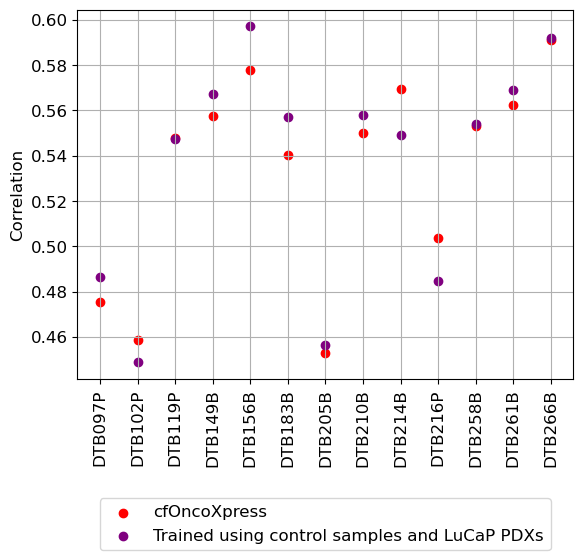

In [47]:
comparison3=pd.DataFrame()
comparison3['sample']=['DTB097P','DTB102P','DTB119P','DTB149B','DTB156B','DTB183B','DTB205B','DTB210B','DTB214B','DTB216P','DTB258B','DTB261B','DTB266B']
comparison3['our cfOncoXpress model']=cfoncoXpress_corr
comparison3['lucap']=lucap_corr

plt.scatter(comparison3['sample'], comparison3['our cfOncoXpress model'], label='cfOncoXpress',color='red', marker='o')
plt.scatter(comparison3['sample'], comparison3['lucap'], label='Trained using control samples and LuCaP PDXs',color='purple', marker='o')


#plt.legend(fontsize=14, title_fontsize=20,loc='upper',bbox_to_anchor=(1, 1))
#plt.xlabel('Sample',fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
# Place the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),fontsize=12, ncol=1)#bbox_to_anchor=(0.5, 1.05)
plt.grid(True)

# plt.savefig('2025figures/FigS4a.pdf', dpi=500, bbox_inches='tight')
plt.show()


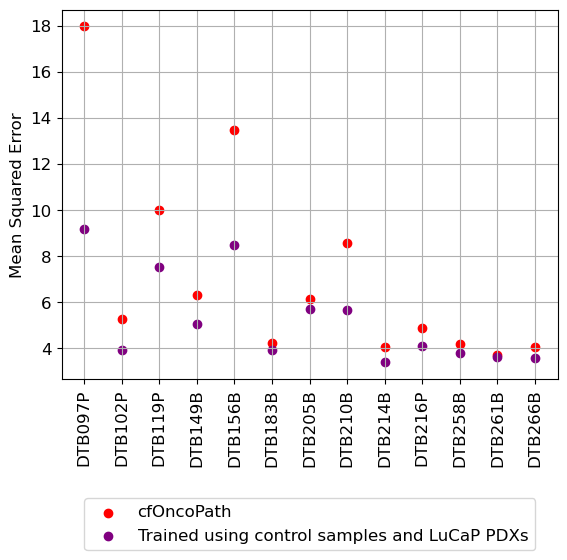

In [48]:
comparison4=pd.DataFrame()
comparison4['sample']=['DTB097P','DTB102P','DTB119P','DTB149B','DTB156B','DTB183B','DTB205B','DTB210B','DTB214B','DTB216P','DTB258B','DTB261B','DTB266B']
comparison4['our cfOncoPath model']=cfoncopath_mse
comparison4['lucap']=lucap_mse

plt.scatter(comparison4['sample'], comparison4['our cfOncoPath model'], label='cfOncoPath',color='red', marker='o')
plt.scatter(comparison4['sample'], comparison4['lucap'], label='Trained using control samples and LuCaP PDXs',color='purple', marker='o')


#plt.legend(fontsize=14, title_fontsize=20,loc='upper',bbox_to_anchor=(1, 1))
#plt.xlabel('Sample',fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
# Place the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),fontsize=12, ncol=1)#bbox_to_anchor=(0.5, 1.05)
plt.grid(True)

# plt.savefig('2025figures/FigS4b.pdf', dpi=500, bbox_inches='tight')
plt.show()


In [ ]:
# S5, S6: Alex

In [ ]:
# Fig. S7

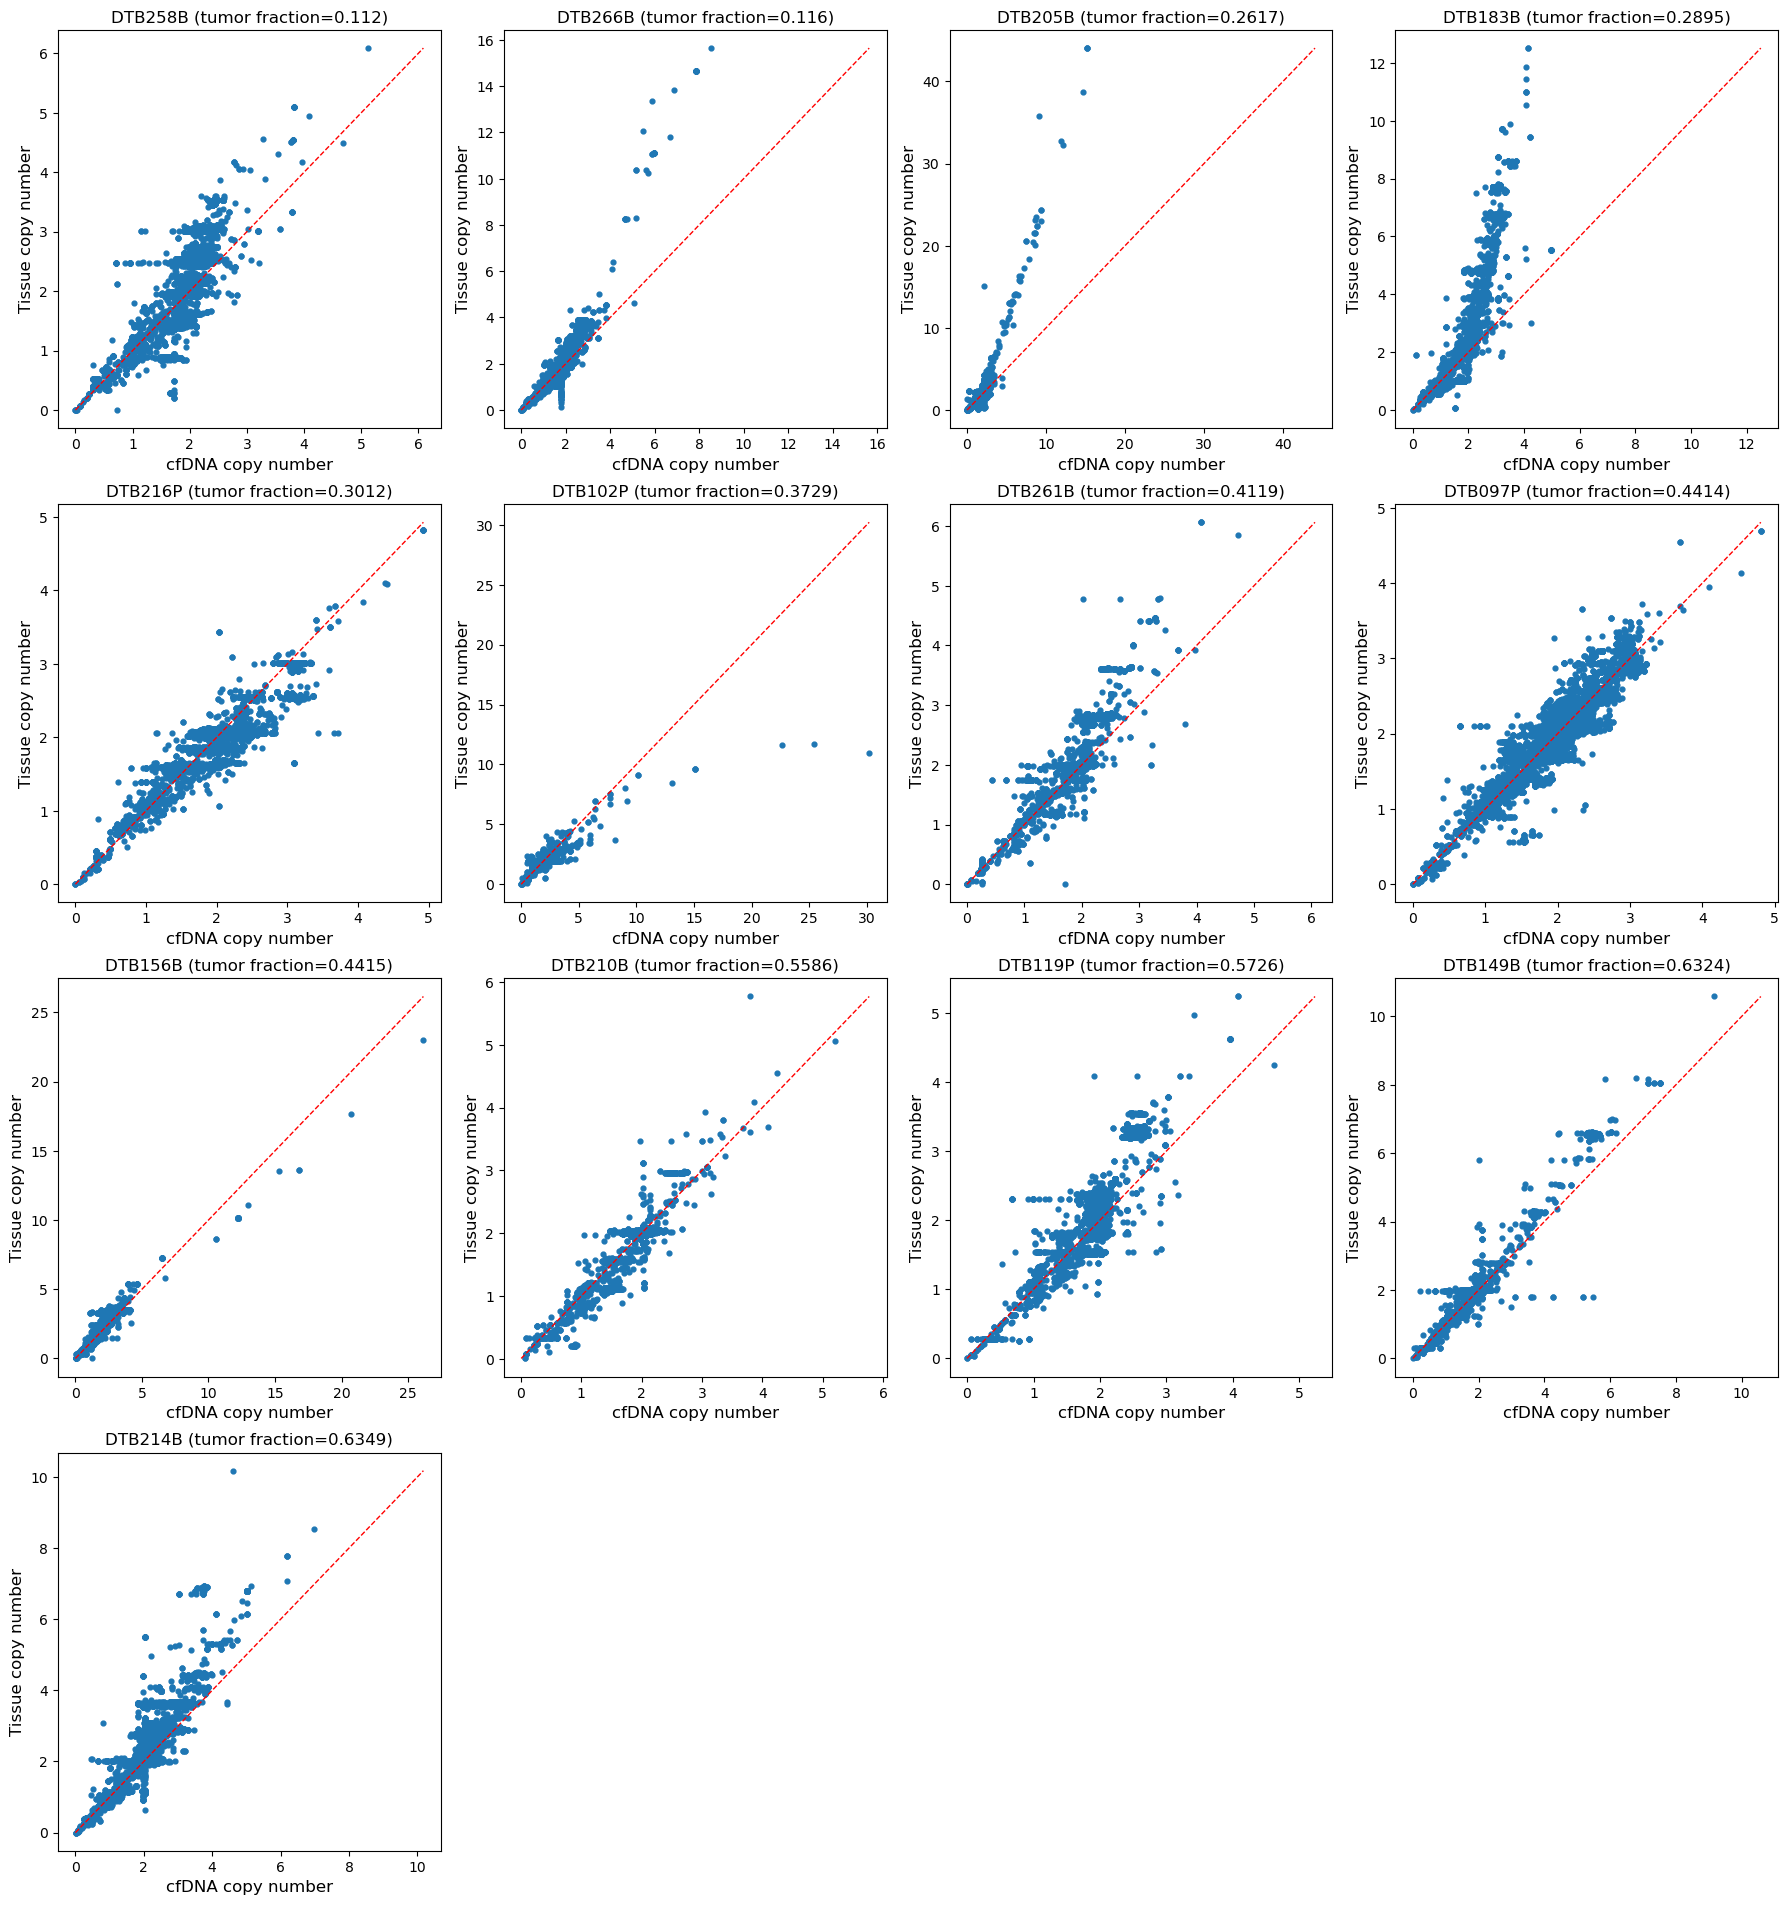

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

tumorfractions = [0.4414,0.3729,0.5726,0.6324,0.4415,0.2895,0.2617,0.5586,0.6349,0.3012,0.112,0.4119,0.116]
samples = [
    'DTB-097-Progression-cfDNA', 'DTB-102-Progression-cfDNA', 'DTB-119-Progression-cfDNA', 'DTB-149-Baseline-cfDNA',
    'DTB-156-Baseline-cfDNA', 'DTB-183-Baseline-cfDNA', 'DTB-205-Baseline-cfDNA', 'DTB-210-Baseline-cfDNA',
    'DTB-214-Baseline-cfDNA', 'DTB-216-Progression-cfDNA', 'DTB-258-Baseline-cfDNA', 'DTB-261-Baseline-cfDNA',
    'DTB-266-Baseline-cfDNA'
]

# Sort samples by tumor fraction
sorted_data = sorted(zip(tumorfractions, samples), key=lambda x: x[0])#, reverse=True)
tumorfractions_sorted, samples_sorted = zip(*sorted_data)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 20))
axes = axes.flatten()

for idx, (tf, s) in enumerate(zip(tumorfractions_sorted, samples_sorted)):
    s2 = s.replace('cfDNA', 'Tumor')

    try:
        cfcnv = pd.read_csv(f'{dir}/cnvkitcna/{s}_genes.mean.bed')
        cfcnv.columns = ['gene_id', 'cfdna_cnv']
        tissuecnv = pd.read_csv(f'{dir}/cnvkitcna/{s2}_genes.mean.bed')
        tissuecnv.columns = ['gene_id', 'tissue_cnv']

        mergedf = pd.merge(cfcnv, tissuecnv, on='gene_id', how='outer')

        ax = axes[idx]
        ax.scatter(mergedf['cfdna_cnv'], mergedf['tissue_cnv'], s=12)

        # Add x = y line
        min_val = min(mergedf['cfdna_cnv'].min(), mergedf['tissue_cnv'].min())
        max_val = max(mergedf['cfdna_cnv'].max(), mergedf['tissue_cnv'].max())
        ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1)

        ax.set_title(
            s.replace('-cfDNA', '').replace('-', '').replace('Progression', 'P').replace('Baseline', 'B') +
            f' (tumor fraction={tf})',#{tf:.4f}
            fontsize=12
        )
        ax.set_xlabel('cfDNA copy number', fontsize=12)
        ax.set_ylabel('Tissue copy number', fontsize=12)
        ax.grid(False)

    except FileNotFoundError:
        print(f"Missing file for sample: {s} or {s2}")
        continue

# Hide unused subplots
for i in range(len(samples_sorted), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.94)
# plt.savefig('2025figures/FigS7.pdf', dpi=500, bbox_inches='tight')
plt.show()
